## Criamos um dataset para exemplificar o estudo da EDA e do PCA
### Após a criação/importação do Dataset, precisamos entender o que queremos.
### É fundamental entender qual é o objetivo do estudo, qual é a necessidade.
### Vamos supor que queremos saber qual o melhor "custo-benefício" dentre os automóveis citados - OBJETIVO: CUSTO-BENEFÍCIO

In [4]:
# IMPORTANDO AS BIBLIOTECAS
import pandas as pd
import numpy as np

In [5]:
#CRIANDO UM DATASET E ANALISANDO VISUALMENTE (ISSO É FUNDAMENTAL PARA ENTENDERMOS O DATASET)
auto = {'modelo': ['Ferrari 488', 'Lamborghini Huracan', 'Aston Martin Vantage', 
                   'McLaren 720S', 'Porsche 911 Turbo', 'Audi R8', 'BMW i8', 
                   'Mercedes AMG GT', 'Nissan GTR', 'Ford GT'],
              'km/litro': [8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
              'cilindros': [8, 10, 12, 8, 6, 8, 3, 8, 6, 8],
              'peso/kg': [1400, 1350, 1250, 1500, 1700, 1600, 1700, 1800, 2000, 1800],
              'velocidade_maxima': [320, 340, 350, 360, 370, 380, 390, 400, 410, 420],
              'cavalos': [700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150],
              'tipo_de_transmissao': ['Manual', 'Automático', 'Automático', 'Manual', 'Automático', 
                                      'Manual', 'Automático', 'Automático', 'Manual', 'Automático'],
              'valor': [300000, 280000, 260000, 240000, 220000, 200000, 180000, 160000, 140000, 120000],
              'categoria': ['Importado', 'Importado', 'Importado', 'Importado', 'Importado', 'Importado', 
                            'Importado', 'Importado', 'Importado', 'Nacional']
       }                

In [7]:
# VISUALIZANDO O DATASET
# A PRIMEIRA COISA QUE NOS CHAMA A ATENÇÃO É QUE TEMOS UM ÚNICO AUTOMÓVEL "NACIONAL", LOGO, COM A COOPERAÇÃO
# DA EQUIPE (ENVOLVIDOS), PODEMOS SUGERIR A RETIRADA DESTA LINHA;
# TAMBÉM PODEMOS DIVIDIR O DATASET EM DOIS OUTROS DATASETS, UM SÓ PARA AUTOMÓVEIS "MANUAL" E OUTRO PARA
# "IMPORTADOS" OU AINDA, PODEMOS ANALISAR DAS DUAS FORMAS, JUNTOS E SEPARADOS (ENTENDIMENTO/NECESSIDADE);
df =pd.DataFrame(auto)
print(df)

                 modelo  km/litro  cilindros  peso/kg  velocidade_maxima  \
0           Ferrari 488         8          8     1400                320   
1   Lamborghini Huracan         9         10     1350                340   
2  Aston Martin Vantage        10         12     1250                350   
3          McLaren 720S        11          8     1500                360   
4     Porsche 911 Turbo        12          6     1700                370   
5               Audi R8        13          8     1600                380   
6                BMW i8        14          3     1700                390   
7       Mercedes AMG GT        15          8     1800                400   
8            Nissan GTR        16          6     2000                410   
9               Ford GT        17          8     1800                420   

   cavalos tipo_de_transmissao   valor  categoria  
0      700              Manual  300000  Importado  
1      750          Automático  280000  Importado  
2      

In [8]:
# BUSCANDO AS INFORMAÇÕES DO DATASET, SEGUINDO O ROTEIRO DO ChatGPT.
# O NOSSO DATASET É PEQUENO, MAS VAMOS SEGUIR O PROTOCOLO.
df.describe() # A função "describe()" nos traz a estatística básica. Podemos destacar a média "mean", que 
# nos trás dados interessante que nos ajudam a entender melhor os dados.

,km/litro,cilindros,peso/kg,velocidade_maxima,cavalos,valor
count,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,12.50000,7.700000,1610.000000,374.00000,925.000000,210000.000000
std,3.02765,2.406011,234.283779,32.04164,151.382518,60553.007082
min,8.00000,3.000000,1250.000000,320.00000,700.000000,120000.000000
25%,10.25000,6.500000,1425.000000,352.50000,812.500000,165000.000000
50%,12.50000,8.000000,1650.000000,375.00000,925.000000,210000.000000
75%,14.75000,8.000000,1775.000000,397.50000,1037.500000,255000.000000
max,17.00000,12.000000,2000.000000,420.00000,1150.000000,300000.000000


In [9]:
df.info() # A função "info()" nos dá um panorama dos tipo de dados e a sua condição.
          # Veja que não temos dados nulos (Non-Null) e os tipos estão descritos corretamente, onde precisa
          # ser texto está "object(string)" ou ainda,onde precisa ser número está "Float/Int (int64)" 
          # É importante lembrar que nem sempre é assim. É muito comum termo valores nulos e descritos de 
          # de forma equivocada. Ex: A coluna " cilindros" poderia está como "object" e seria necessário
          # o tratamento adequado de TRANSFORMAÇÃO DOS DADOS.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   modelo               10 non-null     object
 1   km/litro             10 non-null     int64 
 2   cilindros            10 non-null     int64 
 3   peso/kg              10 non-null     int64 
 4   velocidade_maxima    10 non-null     int64 
 5   cavalos              10 non-null     int64 
 6   tipo_de_transmissao  10 non-null     object
 7   valor                10 non-null     int64 
 8   categoria            10 non-null     object
dtypes: int64(6), object(3)
memory usage: 848.0+ bytes


In [10]:
# A função "corr()" nos traz a correlação entre os dados, o que é muito simples, mas, muito importante, pois,
# "OBSERVANDO" os dados podemos ver a forte "correlação" entre "km/litro x cavalos x valor", que já nos dá
# um entendimento interessante, nos aproximando do objetivo de nossa análise -> CUSTO-BENEFÍCIO. Outro ponto
# importante é a correlação do "km/litro x velocidade_maxima", podemos deduzir que quanto mais rápido, mais
# o consumo aumenta -> Informação importante.
df.corr()

,km/litro,cilindros,peso/kg,velocidade_maxima,cavalos,valor
km/litro,1.000000,-0.465215,0.892862,0.996452,1.000000,-1.000000
cilindros,-0.465215,1.000000,-0.664274,-0.443911,-0.465215,0.465215
peso/kg,0.892862,-0.664274,1.000000,0.874758,0.892862,-0.892862
velocidade_maxima,0.996452,-0.443911,0.874758,1.000000,0.996452,-0.996452
cavalos,1.000000,-0.465215,0.892862,0.996452,1.000000,-1.000000
valor,-1.000000,0.465215,-0.892862,-0.996452,-1.000000,1.000000


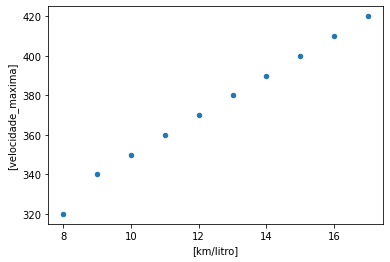

In [16]:
# A finção plo.scatter() nos dá uma visão mais ampla do que vimos na correlação. Repare que, apesar de muito
# simples, fica muito mais fácil entender que "quanto maior a velocidade, maior o consumo".
# a função corrobora com o que vimos na função "df.corr".
df.plot.scatter(['km/litro'],['velocidade_maxima']);

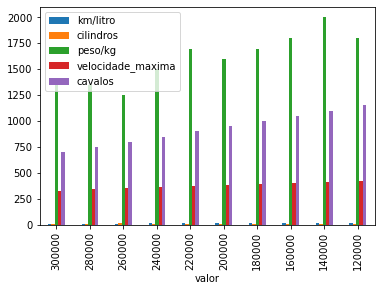

In [31]:
# A função gráfica "df.plot.bar" nos dá um panorama interessante quanto aos "motivos" dos valores dos
# automóveis. Repare que quanto "mais pesado", quanto "mais cavalos", mai "caro" o automóvel fica.
# Este gráfico nos dá uma visão muito próxima de nosso objetivo.
df.plot.bar(x = 'valor');

### Continua no "2"